# Teste de Hipótese no Python

In [ ]:
# Instalando a principal biblioteca Python para aplicações de probabilidade:
# !pip install scipy

# Caso tenha problemas de versão, instale as seguintes bibliotecas:
# !pip install numpy==1.19.3
# !pip install pandas==1.1.4

In [1]:
import pandas as pd

# ler os dados
dados = pd.read_csv('../Database/marketing_data.csv')
dados['sucesso_bin'] = dados['sucesso'].apply(lambda x: 1 if x == 'sim' else 0) # Criando variável de Bernoulli para o sucesso.

print(f"Shape dos Dados: {dados.shape}")
dados.head(10)

Shape dos Dados: (120, 18)


,id_cliente,sucesso,idade,ocupacao,estado_civil,educacao_formal,produto_credito,produto_fin_imob,npl_90,tipo_contato,mes_contato,dia_semana_contato,num_contatos,dias_ult_contato,num_prev_conato,sucesso_prev,saldo,sucesso_bin
0,DNXO0711,nao,45,industria,casado,medio_completo,nao,sim,nd,email,jun,sex,3,999,0,nao_aplica,13000.42,0
1,DNXO0712,nao,46,ti,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.43,0
2,DNXO0713,nao,47,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.44,0
3,DNXO0714,nao,48,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.45,0
4,DNXO0715,nao,49,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.46,0
5,DNXO0716,nao,50,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.47,0
6,DNXO0717,nao,51,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.48,0
7,DNXO0718,nao,52,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.49,0
8,DNXO0719,nao,53,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.50,0
9,DNXO0720,nao,54,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.51,0


## Atenção

Aqui, estamos fazendo um exercício hipotético! Sim, essas 40 mil linhas do dataset chamado "dados" também pode ser uma amostra. Tudo depende de como os dados foram gerados.

Mas, aqui, estamos apenas "supondo" que se trata de todo o conjunto da população de clientes. A partir disso, vamos brincar de gerar amnostras aleatórias, como acontece no dia-a-dia dos negócios de forma real.

*Lembrando também que os dados são fictícios e, principalmente, não se referem a clientes do Itaú.*

## Teste de Hipótese para o Valor Esperado

### Cálculo da estatística de teste

In [2]:
from numpy.random import seed
seed(1995)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)
avg = sample['saldo'].mean()
std = sample['saldo'].std()
h0 = 14000 # Valor da hipótese nula.

print(f"Média de 'saldo' para a amostra de 100 clientes: {avg:.2f}")
print(f"Desvio padrão amostral do 'saldo': {std:.2f}")
print(f"Valor de acordo com a hipótese nula: {h0}")

Média de 'saldo' para a amostra de 100 clientes: 13002.37
Desvio padrão amostral do 'saldo': 2.05
Valor de acordo com a hipótese nula: 14000


In [3]:
from scipy.stats import norm
from numpy import sqrt

et = (avg - h0) / (std / sqrt(N))   # Estatística de teste.
pvalor = 1 - norm.cdf(et) * 2       # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: -4865.4407
P-valor: 1.0000


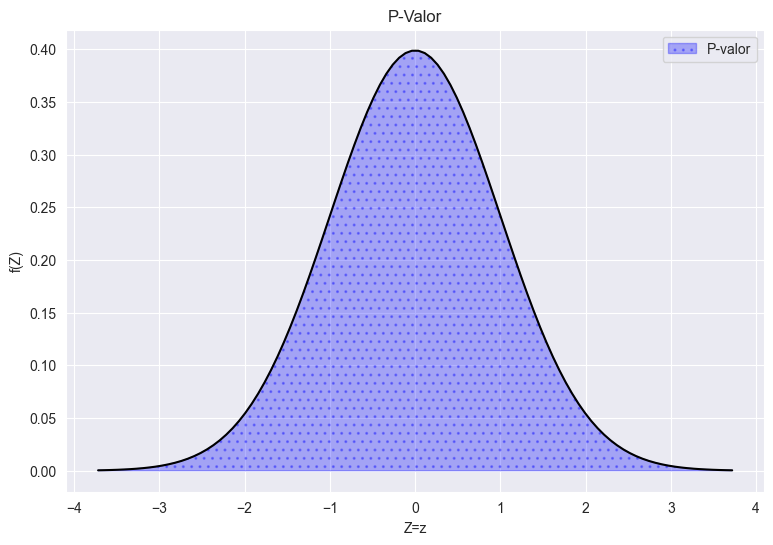

In [4]:
import matplotlib.pyplot as plt # Biblioteca Python de visualização de dados.
import seaborn as sns           # Biblioteca Python de visualização de dados.
from scipy.stats import norm    # Função para construção de uma distribuição normal.
import numpy as np              # Biblioteca Python para manipulação de vetores e matrizes.

valor_esperado = 0  # Valor esperado para a distribuição normal.
desvio_padrao = 1   # Desvio padrão para a distribuição normal.
dom = np.linspace(norm.ppf(0.0001, valor_esperado, desvio_padrao), norm.ppf(0.9999, valor_esperado, desvio_padrao), 100)    # Valores possíveis.

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dom, y=norm.pdf(dom, valor_esperado, desvio_padrao), color='black')
plt.xlabel('Z=z')
plt.ylabel('f(Z)')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > et), hatch="..", color='blue', alpha=.3, label='P-valor')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <= et), color='white')
plt.title('P-Valor')
plt.legend()

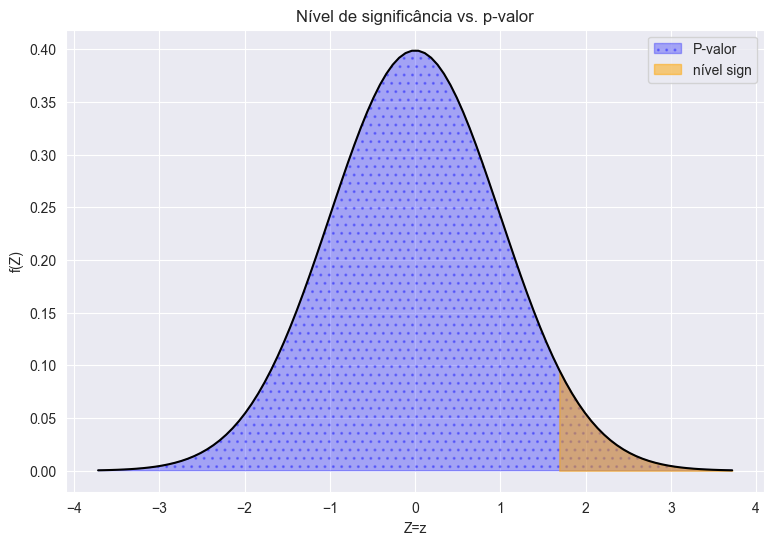

In [5]:
import matplotlib.pyplot as plt # Biblioteca Python de visualização de dados.
import seaborn as sns           # Biblioteca Python de visualização de dados.
from scipy.stats import norm    # Função para construção de uma distribuição normal.
import numpy as np              # Biblioteca Python para manipulação de vetores e matrizes.

valor_esperado = 0  # Valor esperado para a distribuição normal.
desvio_padrao = 1   # Desvio padrão para a distribuição normal.
dom = np.linspace(norm.ppf(0.0001, valor_esperado, desvio_padrao), norm.ppf(0.9999, valor_esperado, desvio_padrao), 100)    # Valores possíveis.

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dom, y=norm.pdf(dom, valor_esperado, desvio_padrao), color='black')
plt.xlabel('Z=z')
plt.ylabel('f(Z)')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > et), hatch="..", color='blue', alpha=.3, label='P-valor')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <= et), color='white')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > norm.ppf(0.95)), color='orange', alpha=.5, label='nível sign')
plt.title('Nível de significância vs. p-valor')
plt.legend()

## Cálculo da estatística de teste.

**Hipóteses:**

In [6]:
from numpy.random import seed
seed(1995)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)
avg = sample['saldo'].mean()
std = sample['saldo'].std()
h0 = 16000 # Valor da hipótese nula.

print(f"Média de 'saldo' para a amostra de 100 clientes: {avg:.2f}")
print(f"Desvio padrão amostral do 'saldo': {std:.2f}")
print(f"Valor de acordo com a hipótese nula: {h0}")

Média de 'saldo' para a amostra de 100 clientes: 13002.37
Desvio padrão amostral do 'saldo': 2.05
Valor de acordo com a hipótese nula: 16000


In [7]:
from numpy import sqrt

et = (avg - h0) / (std / sqrt(N))   # Estatística de teste.
pvalor = 1 - norm.cdf(et)           # P-Valor

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: -14619.4683
P-valor: 1.0000


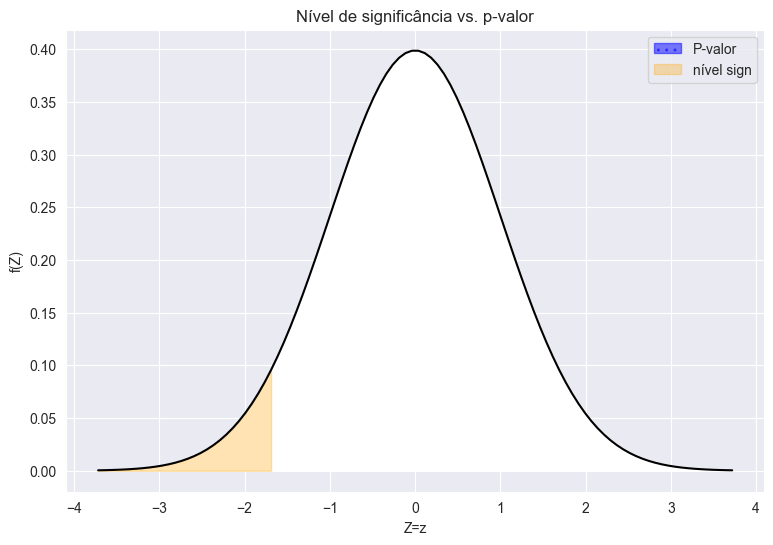

In [8]:
import matplotlib.pyplot as plt # Biblioteca Python de visualização de dados.
import seaborn as sns           # Biblioteca Python de visualização de dados.
from scipy.stats import norm    # Função para construção de uma distribuição normal.
import numpy as np              # Biblioteca Python para manipulação de vetores e matrizes.

valor_esperado = 0  # Valor esperado para a distribuição normal.
desvio_padrao = 1   # Desvio padrão para a distribuição normal.
dom = np.linspace(norm.ppf(0.0001, valor_esperado, desvio_padrao), norm.ppf(0.9999, valor_esperado, desvio_padrao), 100)    # Valores possíveis.

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dom, y=norm.pdf(dom, valor_esperado, desvio_padrao), color='black')
plt.xlabel('Z=z')
plt.ylabel('f(Z)')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <= et), hatch="..", color='blue', alpha=.5, label='P-valor')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > et), color='white')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <=- norm.ppf(0.95)), color='orange', alpha=.3, label='nível sign')
plt.title('Nível de significância vs. p-valor')
plt.legend()

## Cálculo da estatística de teste.

**Hipóteses:**

In [9]:
from numpy.random import seed
seed(1995)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)
avg = sample['saldo'].mean()
std = sample['saldo'].std()
h0 = 13000 # Valor da hipótese nula.

print(f"Média de 'saldo' para a amostra de 100 clientes: {avg:.2f}")
print(f"Desvio padrão amostral do 'saldo': {std:.2f}")
print(f"Valor de acordo com a hipótese nula: {h0}")

Média de 'saldo' para a amostra de 100 clientes: 13002.37
Desvio padrão amostral do 'saldo': 2.05
Valor de acordo com a hipótese nula: 13000


In [10]:
from numpy import sqrt
from scipy.stats import norm    # Função para construção de uma distribuição normal.

et = (avg - h0) / (std / sqrt(N))   # Estatística de teste.
pvalor = (1 - norm.cdf(et)) * 2     # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: 11.5732
P-valor: 0.0000


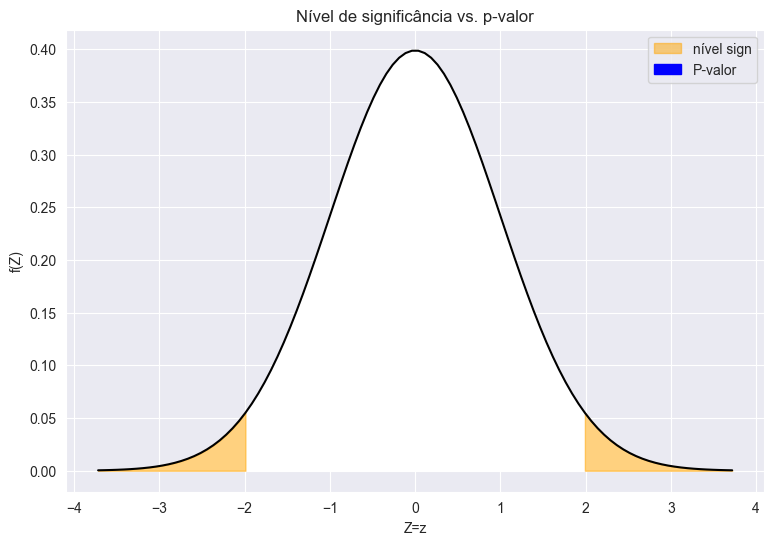

In [11]:
import matplotlib.pyplot as plt # Biblioteca Python de visualização de dados.
import seaborn as sns           # Biblioteca Python de visualização de dados.
from scipy.stats import norm    # Função para construção de uma distribuição normal.
import numpy as np              # Biblioteca Python para manipulação de vetores e matrizes.

valor_esperado = 0  # Valor esperado para a distribuição normal.
desvio_padrao = 1   # Desvio padrão para a distribuição normal.
dom = np.linspace(norm.ppf(0.0001, valor_esperado, desvio_padrao), norm.ppf(0.9999, valor_esperado, desvio_padrao), 100)    # Valores possíveis.

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dom, y=norm.pdf(dom, valor_esperado, desvio_padrao), color='black')
plt.xlabel('Z=z')
plt.ylabel('f(Z)')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom >- norm.ppf(0.975)), color='white')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom < norm.ppf(0.975)), color='white')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > norm.ppf(0.975)), color='orange', alpha=.5, label='nível sign')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <=- norm.ppf(0.975)), color='orange', alpha=.5)
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom > et), hatch="..", color='blue', alpha=1, label='P-valor')
plt.fill_between(dom, norm.pdf(dom, valor_esperado, desvio_padrao), where=(dom <- et), hatch="..", color='blue', alpha=1)
plt.title('Nível de significância vs. p-valor')
plt.legend()

**Veja mais sobre como implementar testes de hipótese no Python no arquivo "Testes de Hipótese no Python.ipynb"**

## Teste de hipótese para a diferença entre duas médias

In [12]:
from numpy.random import seed
seed(1983)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)

In [15]:
sample.groupby('sucesso')['saldo'].mean()

sucesso
nao    13001.235135
sim    13005.237692
Name: saldo, dtype: float64

# Cálculo da estatística de teste

**Hipóteses:**

In [16]:
from numpy.random import seed
seed(1983)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)
avg_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].mean()
std_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].std()
var_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].var()
num_sucesso = len(sample[sample['sucesso'] == 'sim'])

print(f"Média de 'saldo' para a amostra de 100 clientes (subpopulação com sucesso): {avg_sucesso:.2f}")
print(f"Desvio padrão amostral do 'saldo' (subpopulação com sucesso): {std_sucesso:.2f}")
print(f"Número de clientes com sucesso: {num_sucesso}.\n")

avg_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].mean()
std_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].std()
var_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].var()
num_sem_sucesso = len(sample[sample['sucesso'] == 'nao'])

print(f"Média de 'saldo' para a amostra de 100 clientes (subpopulação sem sucesso): {avg_sem_sucesso:.2f}")
print(f"Desvio padrão amostral do 'saldo' (subpopulação sem sucesso): {std_sem_sucesso:.2f}")
print(f"Número de clientes sem sucesso: {num_sem_sucesso}.")

Média de 'saldo' para a amostra de 100 clientes (subpopulação com sucesso): 13005.24
Desvio padrão amostral do 'saldo' (subpopulação com sucesso): 0.89
Número de clientes com sucesso: 26.

Média de 'saldo' para a amostra de 100 clientes (subpopulação sem sucesso): 13001.24
Desvio padrão amostral do 'saldo' (subpopulação sem sucesso): 0.95
Número de clientes sem sucesso: 74.


In [17]:
from numpy import sqrt

et_numerador = (avg_sucesso - avg_sem_sucesso)
et_denominador = sqrt((var_sucesso / num_sucesso) + (var_sem_sucesso / num_sem_sucesso))

et = et_numerador / et_denominador   # Estatística de teste.
pvalor = (norm.cdf(et)) * 2          # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: 19.4454
P-valor: 2.0000


### Rodando com outra amostra para vermos o risco que estamos correndo nesse mundo aleatório. 😮

In [18]:
from numpy.random import seed
seed(1983)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)
avg_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].mean()
std_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].std()
var_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].var()
num_sucesso = len(sample[sample['sucesso'] == 'sim'])

print(f"Média de 'saldo' para a amostra de 100 clientes (subpopulação com sucesso): {avg_sucesso:.2f}")
print(f"Desvio padrão amostral do 'saldo' (subpopulação com sucesso): {std_sucesso:.2f}")
print(f"Número de clientes com sucesso: {num_sucesso}.\n")

avg_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].mean()
std_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].std()
var_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].var()
num_sem_sucesso = len(sample[sample['sucesso'] == 'nao'])

print(f"Média de 'saldo' para a amostra de 100 clientes (subpopulação sem sucesso): {avg_sem_sucesso:.2f}")
print(f"Desvio padrão amostral do 'saldo' (subpopulação sem sucesso): {std_sem_sucesso:.2f}")
print(f"Número de clientes sem sucesso: {num_sem_sucesso}.")

Média de 'saldo' para a amostra de 100 clientes (subpopulação com sucesso): 13005.24
Desvio padrão amostral do 'saldo' (subpopulação com sucesso): 0.89
Número de clientes com sucesso: 26.

Média de 'saldo' para a amostra de 100 clientes (subpopulação sem sucesso): 13001.24
Desvio padrão amostral do 'saldo' (subpopulação sem sucesso): 0.95
Número de clientes sem sucesso: 74.


In [19]:
from numpy import sqrt

et_numerador = (avg_sucesso - avg_sem_sucesso)
et_denominador = sqrt((var_sucesso / num_sucesso) + (var_sem_sucesso / num_sem_sucesso))

et = et_numerador / et_denominador   # Estatística de teste.
pvalor = (norm.cdf(et)) * 2          # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: 19.4454
P-valor: 2.0000


### Experimento que mostra que nem sempre iremos obter uma amostra que nos conduz à conclusão correta

In [20]:
from numpy.random import seed
from numpy import sqrt

N = 100 # Tamanho da amostra.
pvalores = []

for i in range(1000):
    sample = dados.sample(N)
    avg_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].mean()
    std_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].std()
    var_sucesso = sample[sample['sucesso'] == 'sim']['saldo'].var()
    num_sucesso = len(sample[sample['sucesso'] == 'sim'])
    
    avg_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].mean()
    std_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].std()
    var_sem_sucesso = sample[sample['sucesso'] == 'nao']['saldo'].var()
    num_sem_sucesso = len(sample[sample['sucesso'] == 'nao'])
    
    et_numerador = (avg_sucesso - avg_sem_sucesso)
    et_denominador = sqrt((var_sucesso / num_sucesso) + (var_sem_sucesso / num_sem_sucesso))
    
    et = et_numerador / et_denominador   # Estatística de teste.
    pvalor = (norm.cdf(et)) * 2          # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!
    pvalores.append(pvalor)

print(f"p-valor médio: {np.mean(pvalores):.4f}")

p-valor médio: 2.0000


#### Além disso

In [21]:
print(f"Em {len([p for p in pvalores if p < 0.05])} de um total de 1000 amostras rejeitaríamos a hipótese nula!")

Em 0 de um total de 1000 amostras rejeitaríamos a hipótese nula!


#### Mas

In [22]:
dados.groupby('sucesso')['saldo'].mean()

sucesso
nao    13001.255714
sim    13005.287241
Name: saldo, dtype: float64

Viu a importãncia de calcular o p-valor e, mais do que isso, de implementar o método estatístico para teste de hipótese?

Estamos o tempo todo sujeitos à variabilidade amostral! Embora a estatística não nos livre do risco de uma decisão errada, pelo menos ela nos ajuda a **controlar e mensurar esse risco.**

# Teste de hipótese para a diferença entre duas proporções

In [23]:
from numpy.random import seed
seed(2016)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)

In [24]:
sample.groupby('tipo_contato')['sucesso_bin'].mean()

tipo_contato
email       0.314286
whatsapp    0.000000
Name: sucesso_bin, dtype: float64

# Cálculo da estatística de teste

**Hipóteses:**

In [25]:
from numpy.random import seed
seed(2016)  # Garantindo que sempre obteremos o mesmo resultado aleatório.

N = 100 # Tamanho da amostra.
sample = dados.sample(N)

avg_mail = sample[sample['tipo_contato'] == 'email']['sucesso_bin'].mean()
num_email = len(sample[sample['tipo_contato'] == 'email'])

print(f"Proporção de sucessos (clientes conatatos via e-mail): {avg_mail:.4f}.")
print(f"Número de clientes contatados via e-mail: {num_email}.\n")

avg_whats = sample[sample['tipo_contato'] == 'whatsapp']['sucesso_bin'].mean()
num_whats = len(sample[sample['tipo_contato'] == 'whatsapp'])

print(f"Proporção de sucessos (clientes contatos via whatsapp): {avg_whats:.4f}.")
print(f"Número de clientes contatados via whatsapp: {num_whats}.")

Proporção de sucessos (clientes conatatos via e-mail): 0.3143.
Número de clientes contatados via e-mail: 70.

Proporção de sucessos (clientes contatos via whatsapp): 0.0000.
Número de clientes contatados via whatsapp: 30.


In [26]:
from numpy import sqrt

et_numerador = (avg_mail - avg_whats)
et_denominador = sqrt(avg_mail * (1 - avg_mail) / num_email + avg_whats * (1 - avg_whats) / num_whats)

et = et_numerador / et_denominador   # Estatística de teste.
pvalor = (norm.cdf(et)) * 2          # Atenção! Aqui multiplicamos por 2, pois o teste é bilateral!

print(f"Valor da estatística de teste: {et:.4f}")
print(f"P-valor: {pvalor:.4f}")

Valor da estatística de teste: 5.6642
P-valor: 2.0000
